<a href="https://colab.research.google.com/github/McATung/AI/blob/main/AICUOIKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from xml.dom import minidom
import cv2
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from skimage import io

In [ ]:
obj = minidom.parse('gdrive/MyDrive/face1/tung1.xml')
width = obj.getElementsByTagName('width')
int(width[0].firstChild.nodeValue)

225

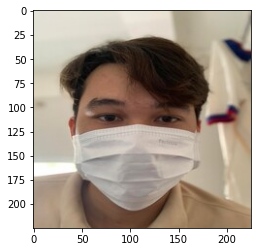

In [ ]:
img = cv2.imread('gdrive/MyDrive/face1/tung1.jpg',cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
def get_value(obj,name) :
    a = int(obj.getElementsByTagName(name)[0].firstChild.nodeValue)
    return a

In [ ]:
xmin = get_value(obj,'xmin')
ymin = get_value(obj,'ymin')
xmax = get_value(obj,'xmax')
ymax = get_value(obj,'ymax')
width = get_value(obj,'width')
height = get_value(obj,'height')

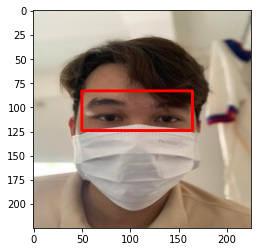

In [ ]:
bnd_img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0),2)
plt.imshow(bnd_img)

In [ ]:
def load_img(path) :
    X = []
    for i in sorted(glob.glob(path)) :
        img = cv2.imread(i,cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(225,225))
        X.append(img)
    return np.asarray(X)

In [ ]:
def load_xml(path) :
    y = []
    for i in sorted(glob.glob(path)) :
        
        obj = minidom.parse(i)
        folder = obj.getElementsByTagName('folder')[0].firstChild.nodeValue
        width = get_value(obj,'width')
        height = get_value(obj,'height')
        xmin = get_value(obj,'xmin')/width
        ymin = get_value(obj,'ymin')/height
        xmax = get_value(obj,'xmax')/width
        ymax = get_value(obj,'ymax')/height   
        y.append([xmin,ymin,xmax,ymax])
    return np.asarray(y)

In [ ]:
X = load_img('gdrive/MyDrive/face1/*.jpg')
X.shape

(150, 225, 225, 3)

In [ ]:
Y = load_xml('gdrive/MyDrive/face1/*.xml')
Y.shape

(150, 4)

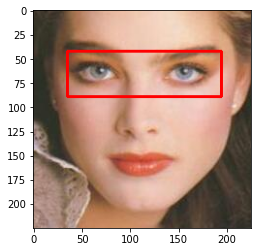

In [ ]:
xmin = int(Y[15][0]*225)
ymin = int(Y[15][1]*225)
xmax = int(Y[15][2]*225)
ymax = int(Y[15][3]*225)
width = get_value(obj,'width')
height = get_value(obj,'height')
bnd_img = cv2.rectangle(X[15],(xmin,ymin),(xmax,ymax),(255,0,0),2)
plt.imshow(bnd_img)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((120, 225, 225, 3), (120, 4), (30, 225, 225, 3), (30, 4))

In [ ]:
y1_train = y_train[:,0:1]
y1_test = y_test[:,0:1]
y2_train = y_train[:,1:]
y2_test = y_test[:,1:]
y1_train.shape,y1_test.shape,y2_train.shape,y2_test.shape

((120, 1), (30, 1), (120, 3), (30, 3))

In [ ]:
y1_train = tf.keras.utils.to_categorical(y1_train)
y1_test = tf.keras.utils.to_categorical(y1_test)

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import datasets, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, AveragePooling2D
import numpy as np
from tensorflow import keras
from keras.layers import BatchNormalization
from keras import backend as K
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(225,225,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4))
model.summary()
model.compile(loss = 'huber', optimizer = 'Adam',metrics = ['accuracy'])               
                

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 225, 225, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      3

In [ ]:
#model.compile(optimizer='adam',loss='huber')

In [ ]:
history=model.fit(X,Y,epochs=500)

Epoch 1/500
5/5 [==============================] - 17s 680ms/step - loss: 1.6140 - accuracy: 0.1733
Epoch 2/500
5/5 [==============================] - 1s 148ms/step - loss: 0.5358 - accuracy: 0.4733
Epoch 3/500
5/5 [==============================] - 1s 150ms/step - loss: 0.3838 - accuracy: 0.3533
Epoch 4/500
5/5 [==============================] - 1s 147ms/step - loss: 0.2220 - accuracy: 0.6933
Epoch 5/500
5/5 [==============================] - 1s 148ms/step - loss: 0.1488 - accuracy: 0.7267
Epoch 6/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0914 - accuracy: 0.7267
Epoch 7/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0613 - accuracy: 0.8133
Epoch 8/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0293 - accuracy: 0.8067
Epoch 9/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0193 - accuracy: 0.9467
Epoch 10/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0119 - accuracy: 0.9800
Epoch 11

In [ ]:
model.save('abc.h5')

Sai số kiểm tra là:  0.22253333032131195


<function matplotlib.pyplot.show>

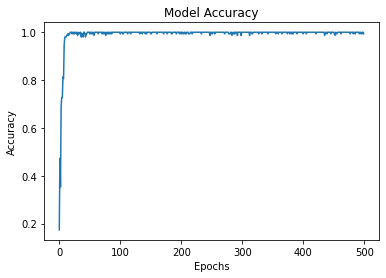

In [ ]:
score = model.evaluate(X_test,[y1_test,y2_test],verbose=0)
print('Sai số kiểm tra là: ',score[0])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show

In [ ]:
pred_img = cv2.imread('/content/images.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))

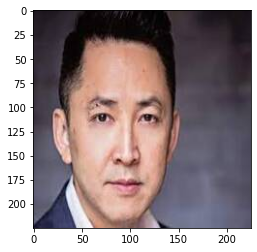

In [ ]:
plt.imshow(pred_img)

In [ ]:
bnd

array([[0.25291172, 0.3506209 , 0.6352126 , 0.5558945 ]], dtype=float32)

In [ ]:
bnd[0][1]*225,

(78.88970151543617,)

In [ ]:
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)

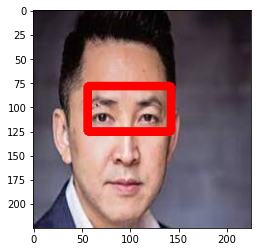

In [ ]:
plt.imshow(img)

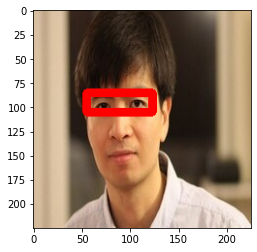

In [ ]:
pred_img = cv2.imread('/content/vietnamese-engineer-works-on-vaccine-patch-high-tech-face-mask.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
bnd[0][1]*225,
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

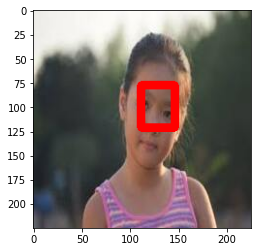

In [ ]:
pred_img = cv2.imread('/content/images (6).jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
bnd[0][1]*225,
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)